# Блок 1.

С помощью symPy найдите полиномы, описывающие данные наборы точек. Затем проведите полное исследование каждого полученного полинома: проверьте четность/нечетность, найдите нули, промежутки знакопостоянства. Постройте их графики. С помощью изменения промежутка для х добейтесь того, чтобы все нули были отображены на графике функции. <br><br><br>
а) $(-4; -4268), (-3; -1227), (-1; -17), (1; 17), (3; 1227), (4; 4268)$<br><br>
б)$ (-4; -16729), (-3; -3999), (-1; 5), (1; 1), (3; 4005), (4; 16735)$


In [3]:
from sympy import *
from sympy.plotting import plot
from sympy.solvers.inequalities import solve_univariate_inequality

init_printing(use_unicode=False, wrap_line=False, no_global=True)

In [4]:
def print_params(f):
    plot(f)
    print('Нули функции')
    print(solve(f))
    for res in solve(f):
        print(res.evalf())

    print('\nПромежутки знакопостоянства: ')
    print('f > 0:', solve_univariate_inequality(f > 0, x))
    print('f < 0:', solve_univariate_inequality(f < 0, x))
    
    is_parity = (f == f.subs(x, -x))
    is_oddness = (f == (-1)*f.subs(x, -x))
    
    print(f"\nФункция {'' if is_parity else 'не '}является четной")
    print(f"\nФункция {'' if is_oddness else 'не '}является нечетной")

In [5]:
x, y = symbols('x, y', real=True)
a0, a1, a2, a3, a4, a5 = symbols('a0, a1, a2, a3, a4, a5', real=True)

In [6]:
pol_pow5 = a5*x**5 + a4*x**4 + a3*x**3 + a2*x**2 + a1*x + a0
eq_lp_pow5 = pol_pow5 - y

In [9]:
list_k = (a5, a4, a3, a2, a1, a0)
list_solve = nonlinsolve((eq_lp_pow5.subs({x: -4, y: -4268}), 
            eq_lp_pow5.subs({x: -3, y: -1227}), 
            eq_lp_pow5.subs({x: -1, y: -17}),
            eq_lp_pow5.subs({x: 1, y: 17}),
            eq_lp_pow5.subs({x: 3, y: 1227}),
            eq_lp_pow5.subs({x: 4, y: 4268})), list_k)
list_solve

In [10]:
f1_pow5 = pol_pow5.subs(dict(zip(list_k, list_solve.args[0])))
f1_pow5

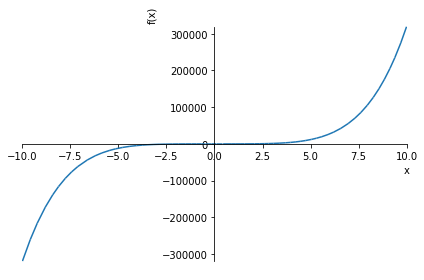

Нули функции
[0, -sqrt(-19/6 + sqrt(421)/6), sqrt(-19/6 + sqrt(421)/6)]
0
-0.503038190843596
0.503038190843596

Промежутки знакопостоянства: 
f > 0: (sqrt(-19/6 + sqrt(421)/6) < x) | ((x < 0) & (-sqrt(-19/6 + sqrt(421)/6) < x))
f < 0: (x < -sqrt(-19/6 + sqrt(421)/6)) | ((0 < x) & (x < sqrt(-19/6 + sqrt(421)/6)))

Функция не является четной

Функция является нечетной


In [11]:
print_params(f1_pow5)

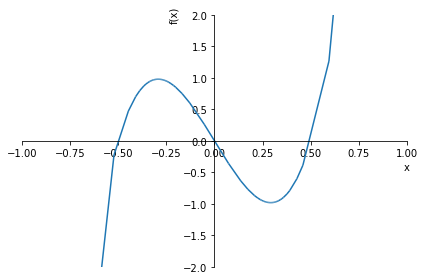

In [15]:
# посмотрим нули крупнее
plot(f1_pow5, ylim=(-2, 2), xlim=(-1, 1))

In [16]:
# (-4; -16729), (-3; -3999), (-1; 5), (1; 1), (3; 4005), (4; 16735)

list_k = (a5, a4, a3, a2, a1, a0)
list_solve = nonlinsolve((eq_lp_pow5.subs({x: -4, y: -16729}), 
            eq_lp_pow5.subs({x: -3, y: -3999}), 
            eq_lp_pow5.subs({x: -1, y: 5}),
            eq_lp_pow5.subs({x: 1, y: 1}),
            eq_lp_pow5.subs({x: 3, y: 4005}),
            eq_lp_pow5.subs({x: 4, y: 16735})), list_k)
list_solve

In [17]:
f2_pow5 = pol_pow5.subs(dict(zip(list_k, list_solve.args[0])))
f2_pow5

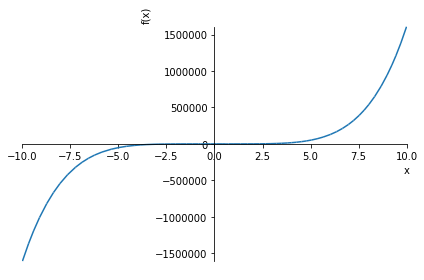

Нули функции
[CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 0), CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 1), CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 2)]
-1.05748920058586
0.120506253533285
0.986407581732483

Промежутки знакопостоянства: 
f > 0: (CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 2) < x) | ((x < CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 1)) & (CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 0) < x))
f < 0: (x < CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 0)) | ((x < CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 2)) & (CRootOf(16*x**5 + 7*x**3 - 25*x + 3, 1) < x))

Функция не является четной

Функция не является нечетной


In [18]:
print_params(f2_pow5)

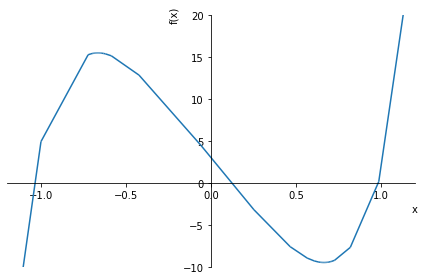

In [22]:
# посмотрим нули крупнее
plot(f2_pow5, ylim=(-10, 20), xlim=(-1.2, 1.2))

# Блок 2.

In [23]:
from sympy import *
from sympy.plotting import plot
init_printing(use_unicode=False, wrap_line=False, no_global=True)

In [24]:
import matplotlib.pyplot as plt
import numpy as np

In [25]:
x = Symbol('x')

## 1.
### Получите значение MSE меньшее 5.

In [26]:
def print_points_ands_function1(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([2, -4, 1, 8, 21, 40, 47, 65, 75, 92])
    plt.xlim(-6, 10)
    plt.ylim(-1, 100)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [28]:
f1 = 48 * x**2 - 128 * x + 83
f1

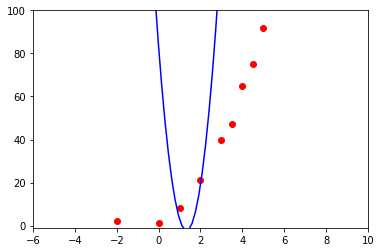

MSE = 93691.3


In [30]:
print_points_ands_function1(f1)

In [40]:
f11 = f1.subs(x, x/4)
f11

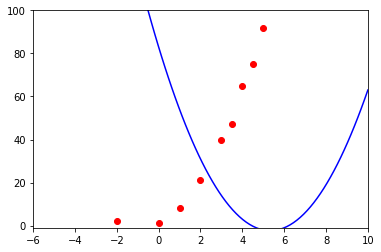

MSE = 6903.2125


In [41]:
print_points_ands_function1(f11)

In [70]:
f12 = expand(f11.subs(x, x+6)) 
f12

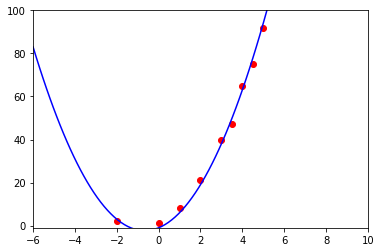

MSE = 4.4125


In [71]:
print_points_ands_function1(f12)

## 2.
### Получите значение MSE меньшее 35.

In [73]:
def print_points_ands_function2(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([-31, -9, 4, -1, 9, 24, 47, 92, 120, 170])
    plt.xlim(-3, 6)
    plt.ylim(-35, 200)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [74]:
f2 = 4 * x**3 + 30 * x**2 + 74 * x + 62
f2

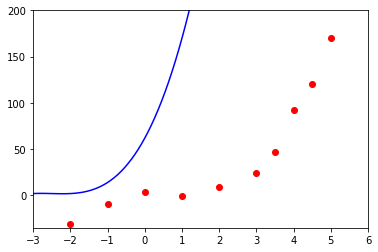

MSE = 607200.2


In [75]:
print_points_ands_function2(f2)

In [93]:
f21 = expand(f2.subs(x, x - 3))
f21

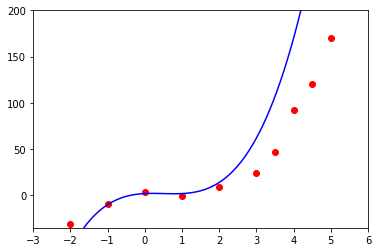

MSE = 6671.6


In [94]:
print_points_ands_function2(f21)

In [95]:
f22 = 1/2*f21 
f22

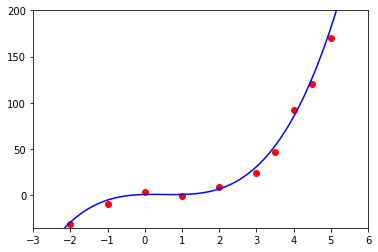

MSE = 34.725


In [96]:
print_points_ands_function2(f22)

## 3.
### Получите значение MSE меньшее 3300.

In [97]:
def print_points_ands_function3(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([60, 25, 4, -0, -57, -195, -295, -540, -700, -760])
    plt.xlim(-10, 6)
    plt.ylim(-850, 100)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [98]:
f3 = -36 * x**3 - 756 * x**2 - 5334 * x - 12636
f3

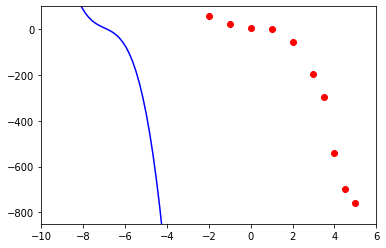

MSE = 1346344545.35


In [99]:
print_points_ands_function3(f3)

In [105]:
f31 = expand(f3.subs(x, x - 7))
f31

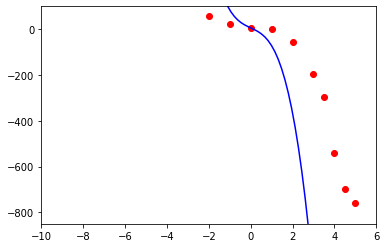

MSE = 2984213.75


In [106]:
print_points_ands_function3(f31)

In [113]:
f32 = f31/6
f32

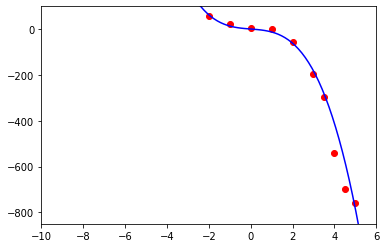

MSE = 3295.5625


In [114]:
print_points_ands_function3(f32)

## 4.
### Получите значение MSE меньшее 25.

In [115]:
def print_points_ands_function4(sympy_function):
    def function(x_): return float(sympy_function.subs(x, x_))
    
    points_X = np.array([-2, -1, 0, 1, 2, 3, 3.5, 4, 4.5, 5])
    points_Y = np.array([-42, -37, -23, -36, -45, -80, -83, -110, -131, -155])
    plt.xlim(-4, 20)
    plt.ylim(-160, -10)
    
    plt.scatter(points_X, points_Y, c='r')
    x_range = np.linspace(plt.xlim()[0], plt.xlim()[1], num=100)
    function_Y = [function(x_) for x_ in x_range]
    plt.plot(x_range, function_Y, 'b')
    plt.show()
    
    MSE = sum([(points_Y[i] - function(points_X[i]))**2 for i in range(len(points_Y))]) / len(points_Y)
    print(f'MSE = {MSE}')

In [116]:
f4 = - 5 / 4 * x**2 + 25 * x - 152
f4

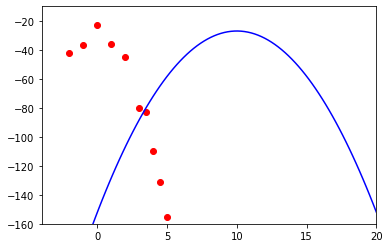

MSE = 9143.51953125


In [117]:
print_points_ands_function4(f4)

In [118]:
f41 = expand(f4.subs(x, x + 10))
f41

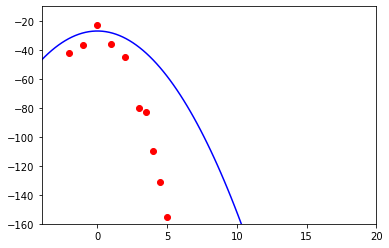

MSE = 2334.14453125


In [119]:
print_points_ands_function4(f41)

In [120]:
f42 = f41.subs(x, 2*x)
f42

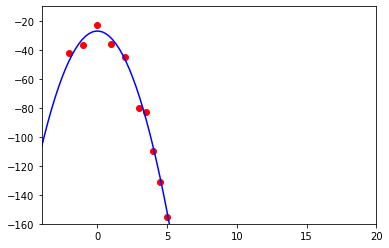

MSE = 20.3125


In [121]:
print_points_ands_function4(f42)